## Background

Bangkok, Thailand menjadi salah satu destinasi wisata paling populer di Asia Tenggara, menarik jutaan wisatawan setiap tahunnya. Berdasarkan salah satu situs resmi Otoritas Pariwisata Thailand (Tourism Authority of Thailand atau TAT), 'https://intelligencecenter.tat.or.th/articles/15949', diketahui bahwa pada tahun 2022 terjadi peningkatan jumlah wisatawan mancanegara, tercatat bahwa jumlahnya meningkat lebih dari 7juta jiwa dibandingkan tahun sebelumnya.

Melihat potensi pasar yang besar, pemilik bisnis perhotelan dari perusahaan **SuperWay Asset Corporation** `berencana membangun penginapan baru yang berfokus pada lokasi strategis, dekat dengan atraksi wisata dan akses transportasi yang mudah.` **Dengan kata lain,** `perusahaan ingin menangkap peluang bisnis yang sedang tumbuh di sektor pariwisata Bangkok dengan cara menyediakan akomodasi yang nyaman dan strategis bagi wisatawan.`

## Problems
Rumusan masalahnya dapat dijabarkan sebagai berikut:
- Bagaimana distribusi listing Airbnb di Bangkok, Thailand?
- Daerah mana yang meiliki potensi pasar tinggi dengan tingkat persaingan rendah?
- Tipe room seperti apa rata-rata per daerah yang popularitas tinggi?
- Bagaimana rata-rata harga yang ditawarkan per malam di setiap daerah?
- Bagaimana fasilitas umum atau insfrastruktur pendukung di daerah tersebut?


## Goals
1. Mengevaluasi distribusi daftar listing di seluruh daerah Bangkok dan mengidentifikasi konsentrasi di lokasi tertentu.
2. Memahami prefensi tipe kamar yang popular.
3. Mengidentifikasi rata-rata harga berdasarkan tipe kamar di setiap daerah dan melihat korelasinya terhadap daerah hunian.

## Data

In [212]:
# Importing Libraries and Dataset

import pandas as pd
import numpy as np
from datetime import datetime
from scipy import stats
import statsmodels.api as sm
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import folium
import geopandas as gpd
from shapely.geometry import Polygon
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# import missingno as msno

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns', 500)


**Deskripsi Fitur**

* **id:** Identifikasi unik dari Airbnb untuk daftar properti.
* **name:** Nama dari daftar properti.
* **host_id:** Identifikasi unik dari Airbnb untuk host/pemilik.
* **host_name:** Nama dari host. Biasanya hanya berupa nama depan.
* **neighborhood:** Lingkungan sekitar properti, yang dikodekan berdasarkan geolokasi menggunakan garis lintang dan bujur.
* **latitude:** Menggunakan sistem proyeksi World Geodetic System (WGS84) untuk menentukan garis lintang.
* **longitude:** Menggunakan sistem proyeksi World Geodetic System (WGS84) untuk menentukan garis bujur.
* **room_type:** [Entire home/apt | Private room | Shared room | Hotel]
* **price:** Harga harian dalam mata uang lokal. Perlu dicatat bahwa simbol $ dapat digunakan meskipun lokasinya berbeda.
* **minimum_nights:** Jumlah malam minimum untuk menginap di properti tersebut (aturan kalender mungkin berbeda).
* **number_of_reviews:** Jumlah ulasan yang dimiliki oleh listingan tersebut.
* **last_review:** Tanggal ulasan terbaru.
* **reviews_per_month:** Jumlah ulasan yang didapatkan dan dirata-ratakan per bulannya.
* **calculated_host_listings_count:** Jumlah listingan yang dimiliki oleh host pada pengambilan data terkini di wilayah kota/daerah tersebut.
* **availability_365:** Ketersediaan berdasarkan kalender, menentukan ketersediaan listing untuk x hari ke depan. Catatan bahwa listing mungkin tersedia karena telah dipesan oleh tamu atau diblokir oleh host.
* **number_of_reviews_ltm:** Jumlah ulasan yang diterima listing dalam 12 bulan terakhir.

# Understanding & Cleansing Data

Step 1: Data Cleaning
- Melihat informasi tabel seperti jumlah kolom/baris
- Menghapus duplicate baris
- Check & Handling Missing Values
- Penyesuaian Format data
- Check & Handling Outlier
- Dropping Unrelevant Columns

In [213]:
# Read Data

df=pd.read_csv("Fix Airbnb Listings Bangkok.csv")
df.head()

Unnamed: 0      id                                            name  \
0           0   27934                 Nice room with superb city view   
1           1   27979                  Easy going landlord,easy place   
2           2   28745               modern-style apartment in Bangkok   
3           3   35780  Spacious one bedroom at The Kris Condo Bldg. 3   
4           4  941865                      Suite Room 3 at MetroPoint   

   host_id   host_name neighbourhood  latitude  longitude        room_type  \
0   120437      Nuttee   Ratchathewi  13.75983  100.54134  Entire home/apt   
1   120541         Emy       Bang Na  13.66818  100.61674     Private room   
2   123784  Familyroom     Bang Kapi  13.75232  100.62402     Private room   
3   153730     Sirilak     Din Daeng  13.78823  100.57256     Private room   
4   610315       Kasem     Bang Kapi  13.76872  100.63338     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0   1905               3                 65  2020-01-06               0.50   
1   1316               1                  0         NaN                NaN   
2    800              60                  0         NaN                NaN   
3   1286               7                  2  2022-04-01               0.03   
4   1905               1                  0         NaN                NaN   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  
0                               2               353                      0  
1                               2               358                      0  
2                               1               365                      0  
3                               1               323                      1  
4                               3               365                      0

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

In [215]:
print('Descriptive Stats for Number')
display(df.describe(include='number'))
print('Descriptive Stats for Object')
display(df.describe(include='object'))

Descriptive Stats for Number


Unnamed: 0            id       host_id      latitude     longitude  \
count  15854.000000  1.585400e+04  1.585400e+04  15854.000000  15854.000000   
mean    7926.500000  1.579397e+17  1.541058e+08     13.745144    100.559903   
std     4576.799919  2.946015e+17  1.318726e+08      0.043040      0.050911   
min        0.000000  2.793400e+04  5.892000e+04     13.527300    100.329550   
25%     3963.250000  2.104509e+07  3.974431e+07     13.720090    100.529690   
50%     7926.500000  3.503734e+07  1.224556e+08     13.738490    100.561415   
75%    11889.750000  5.256154e+07  2.390547e+08     13.759497    100.585150   
max    15853.000000  7.908162e+17  4.926659e+08     13.953540    100.923440   

              price  minimum_nights  number_of_reviews  reviews_per_month  \
count  1.585400e+04    15854.000000       15854.000000       10064.000000   
mean   3.217704e+03       15.292355          16.654157           0.813145   
std    2.497212e+04       50.815020          40.613331           1.090196   
min    0.000000e+00        1.000000           0.000000           0.010000   
25%    9.000000e+02        1.000000           0.000000           0.120000   
50%    1.429000e+03        1.000000           2.000000           0.435000   
75%    2.429000e+03        7.000000          13.000000           1.060000   
max    1.100000e+06     1125.000000        1224.000000          19.130000   

       calculated_host_listings_count  availability_365  number_of_reviews_ltm  
count                    15854.000000      15854.000000           15854.000000  
mean                        13.889618        244.378643               3.481519  
std                         30.269848        125.843224               8.916937  
min                          1.000000          0.000000               0.000000  
25%                          1.000000        138.000000               0.000000  
50%                          4.000000        309.000000               0.000000  
75%                         13.000000        360.000000               3.000000  
max                        228.000000        365.000000             325.000000

Descriptive Stats for Object


name host_name  \
count                                              15846     15853   
unique                                             14794      5312   
top     New!  La Chada Night Market studio 2PPL near MRT     Curry   
freq                                                  45       228   

       neighbourhood        room_type last_review  
count          15854            15854       10064  
unique            50                4        1669  
top          Vadhana  Entire home/apt  2022-12-11  
freq            2153             8912         189

In [216]:
# 1. Check & Handling Missing Values

df_null = df.isnull().sum().reset_index().rename(columns={'index':'column', 0:'Missing Value'})
df_null['Percentage Total Missing Value'] = (df_null['Missing Value']/len(df)*100).round(2)
df_null

column  Missing Value  \
0                       Unnamed: 0              0   
1                               id              0   
2                             name              8   
3                          host_id              0   
4                        host_name              1   
5                    neighbourhood              0   
6                         latitude              0   
7                        longitude              0   
8                        room_type              0   
9                            price              0   
10                  minimum_nights              0   
11               number_of_reviews              0   
12                     last_review           5790   
13               reviews_per_month           5790   
14  calculated_host_listings_count              0   
15                availability_365              0   
16           number_of_reviews_ltm              0   

    Percentage Total Missing Value  
0                             0.00  
1                             0.00  
2                             0.05  
3                             0.00  
4                             0.01  
5                             0.00  
6                             0.00  
7                             0.00  
8                             0.00  
9                             0.00  
10                            0.00  
11                            0.00  
12                           36.52  
13                           36.52  
14                            0.00  
15                            0.00  
16                            0.00

In [217]:
# Copy data awal untuk cleaning

df_clean = df.copy()

In [218]:
# Dropping Missing Values

# Missing value pada 'name' tidak berpengaruh signifikan terhadap data

df_clean = df_clean.dropna(subset=['name'])

In [219]:
# Missing value pada 'host_name' tidak berpengaruh signifikan terhadap data

df_clean = df_clean.dropna(subset=['host_name'])

In [220]:
# Filling Missing Values

# Untuk melihat apakah ada hubungan antara data yang kosong di kolom last_review dan reviews_per_month

condition = df_clean['last_review'].isna()
result = df_clean[condition]['last_review'].isna() & df_clean[condition]['last_review'].isna()
if result.all() : 
    print("Semua baris dengan 'last_review' null memiliki 'reviews_per_month' null dan 'number_of_reviews' 0.")
elif result.any() :
    print("Beberapa baris dengan 'last_review' null memiliki 'reviews_per_month' null dan 'number_of_reviews' 0." )
else : 
    print("Tidak ada baris dengan 'last_review' null memiliki 'reviews_per_month' null dan 'number_of_reviews' 0.")


Semua baris dengan 'last_review' null memiliki 'reviews_per_month' null dan 'number_of_reviews' 0.


In [221]:
'''
Dari data diatas, maka dapat diasumsikan bahwa nilai yang hilang disebabkan oleh tidak adanya reviews yang diberikan oleh customer. 
Maka dari itu akan dilakukan pengisian value dengan tanggal '01-01-2000' sebagai default untuk data kosong pada kolom last_review.

Sedangkan untuk missing value pada 'reviews_per_month' akan diisi dengan nilai 0.
Dengan asumsi ketika 'number_of_reviews' 0 berarti listing sepi dan tidak ada customer.
'''

df_clean['last_review'] = df_clean['last_review'].fillna(pd.to_datetime('2000-01-01').date())

In [222]:
df_clean['reviews_per_month'] = df_clean['reviews_per_month'].fillna(0)

In [223]:
# Mengubah kolom 'last_review' menjadi tipe datetime
df_clean['last_review'] = pd.to_datetime(df_clean['last_review'])

# Mengubah kolom 'last_review' menjadi datetime dengan format 'YYYY-MM-DD'
df_clean['last_review'] = pd.to_datetime(df_clean['last_review'], format='%Y-%m-%d')

> Penghapusan missing values pada kolom 'name' dan 'host_name' dilakukan karena jumlah data yang kosong tidak berpengaruh signifikan terhadap data yang lain.

> Pengisian data yang kosong pada kolom 'last_review' dan 'reviews_per_month' karena ditemukan keterkaitan antara data yang hilang di kedua kolom dengan kolom lain yaitu pada kolom 'number_of_reviews', dimana mengisi missing values pada kolom last review menandakan bahwa listing airbnb tersebut tidak memiliki review.

> Pengubahan data type pada kolom 'last_review' dilakukan untuk mengatasi error yang akan terjadi saat pengisian values menjadi 0 yang menjebabkan data type berubah.

In [224]:
# 2. Check & Handling Duplicate Data

# Identifikasi data duplikat

print('Jumlah data duplicate:', df_clean.duplicated().sum())

Jumlah data duplicate: 0


> Tidak ditemukan adanya data yang duplikat.

In [225]:
# 3. Penyesuaian Format Data

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15845 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      15845 non-null  int64         
 1   id                              15845 non-null  int64         
 2   name                            15845 non-null  object        
 3   host_id                         15845 non-null  int64         
 4   host_name                       15845 non-null  object        
 5   neighbourhood                   15845 non-null  object        
 6   latitude                        15845 non-null  float64       
 7   longitude                       15845 non-null  float64       
 8   room_type                       15845 non-null  object        
 9   price                           15845 non-null  int64         
 10  minimum_nights                  15845 non-null  int64         
 11  number_

In [226]:
# Mengubah tipe data kolom 'host_id' menjadi objek

df_clean['host_id'] = df_clean['host_id'].astype(str)

In [227]:
# Mengubah tipe data kolom 'id' menjadi objek

df_clean['id'] = df_clean['id'].astype(str)

> Pengubahan tipe data pada kolom 'host_id' dan 'id' dari int menjadi str untuk mengatisipisasi penggunanya di tahap selanjutnya.

In [228]:
# 4. Check & Handling Outlier

df_clean.groupby('room_type').size().reset_index(name='count')

room_type  count
0  Entire home/apt   8911
1       Hotel room    649
2     Private room   5762
3      Shared room    523

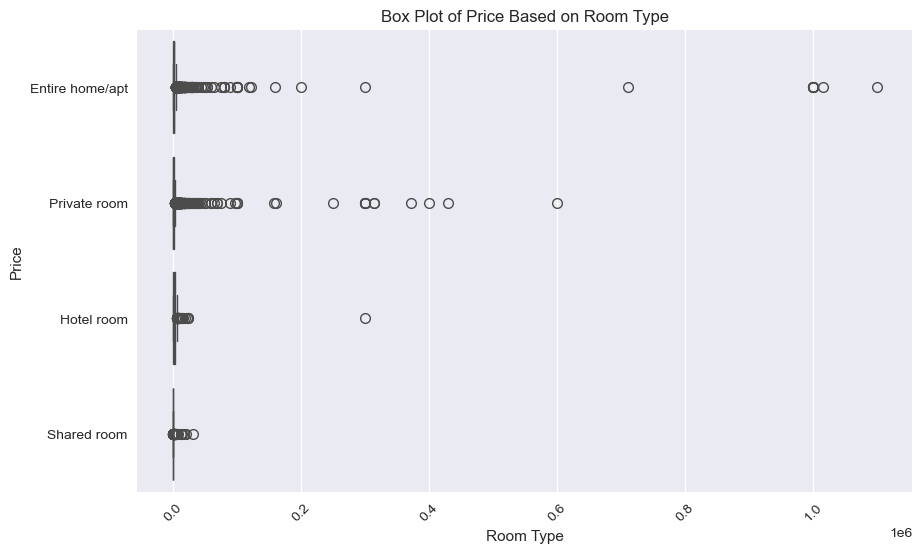

In [229]:
# Check Outliers pada kolom Price

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, y='room_type', x='price')
plt.xticks(rotation=45)
plt.title('Box Plot of Price Based on Room Type')

plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

In [230]:
# Cek harga maksimal dan minimal pada setiap type room

price_summary = pd.DataFrame({
    'Max Price': df_clean.groupby('room_type')['price'].max(),
    'Min Price': df_clean.groupby('room_type')['price'].min()
})

# Menampilkan hasil dalam kolom
display(price_summary)


Max Price  Min Price
room_type                            
Entire home/apt    1100000        332
Hotel room          300000          0
Private room        600700        278
Shared room          31200        280

> * Pada boxplot terlihat adanya outliers pada kolom Price untuk room type Entire home/apt sebesar 1,100,000 Thailand Baht, Private room sebesar 600,700 Thailand Bath, dan Hotel room sebesar 300,000 Thailand Bath per malam, namun setelah dilakukan pengecekan pada Website Airbnb Bangkok ternyata hal ini merupakan representatif dari pasar atau bukan merupakan kasus yang unik.

> * Pada kolom Price ditemukan bahwa adanya values 0 Thailand Baht pada room type Hotel, dimana hal ini tidak mungkin terjadi, maka selanjutnya akan dilakukan penghapusan pada baris dengan kolom Price = 0

In [231]:
# Menghapus baris dengan nilai `price` sama dengan nol
df_clean = df_clean[df_clean['price'] != 0]

Terlihat ada beberapa outliers di kolom 'price', terutama di tipe Entire home/apt

In [232]:
df_clean.groupby('room_type')['price'].max()

room_type
Entire home/apt    1100000
Hotel room          300000
Private room        600700
Shared room          31200
Name: price, dtype: int64

> Setelah dilakukan pengecekan langsung pada website Airbnb ternyata outliers pada kolom 'price' disetiap room_type bukan hal anomali, namun memang terbukti ada harga-harga semahal itu. <br> Maka dari itu outliers pada kolom 'price' akan dibiarkan.

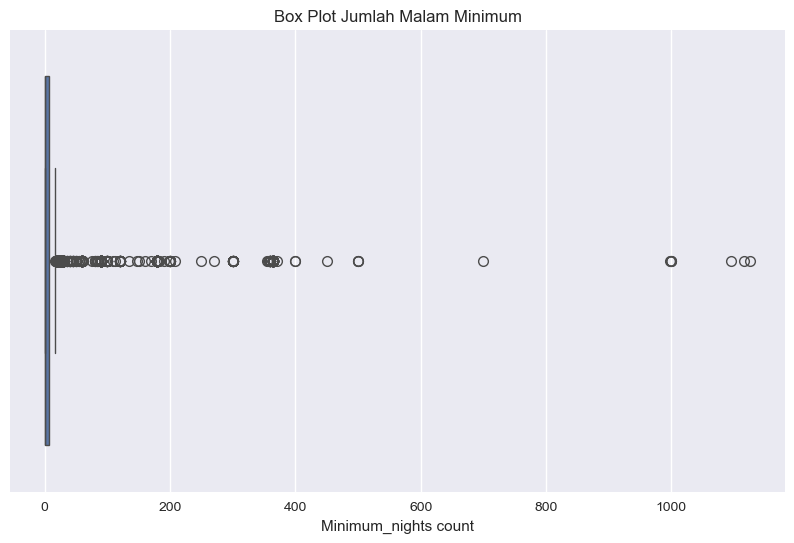

In [233]:
# Check Outliers pada kolom Minimum Night

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_clean['minimum_nights'])
plt.title('Box Plot Jumlah Malam Minimum')
plt.xlabel('Minimum_nights count')
plt.show()


In [234]:
# Angka maksimal lama periode kita tinggal yang ada di platform airbnb adalah 12 bulan, artinya kita cek yang lebih 365 hari.

print('jumlah baris minimum_night lebih dari 12 bulan = ',len(df_clean[df_clean['minimum_nights']>365]))
print('jumlah baris minimum_night yang satu malam = ',len(df_clean[df_clean['minimum_nights']==1]))


jumlah baris minimum_night lebih dari 12 bulan =  15
jumlah baris minimum_night yang satu malam =  8250


> - Setelah dilakukan pengecekan pada website Airbnb ditemukan bahwa pesenanan dalam jangka panjang dibatasi untuk jangka waktu 365hari. Maka akan `diasumsikan` bahwa data minimum_nights >365 sebagai kesalahan input yang harus diatasi.
> - Akan dilakukan manipulasi data pada minimum_nights>365, akan dikelompokkan menjadi satu di 365 hari
> - Lalu akan dibuat kolom baru `nights_category` dengan 2 kategori: short-term<28 hari & long-term = 28+ hari

In [235]:
df_clean['minimum_nights'] = np.where(df_clean['minimum_nights'] > 365, 365, df_clean['minimum_nights'])

In [236]:
# 5. Dropping Unrelevant Columns

df_clean= df_clean.drop(columns=['Unnamed: 0', 'name', 'last_review', 'number_of_reviews_ltm'])

In [237]:
# 6. Creating new kolom untuk mengelompokkan Neingbourhood

# Menambahkan Kolom Area pada df_clean untuk mengelompokkan 'neigbourhoods'

'''
Based on data by Department of City Panning BMA: Bangkok, Thailand (2011), the city are divided into 3 main areas: 
- `Inner city` (22 districts, teh old city center dominated by the historical area, government offices, schools, and densely populated commercial area)
- the `Urban fringe` (22 districts, area of population expansion, commercial and residential activities, located within 10-20km radius of the city center), and 
- `Suburban` (6 districts, the outer of BMA, dominated by empty spaces and farming area with a mixture of urban and rural).
'''

def category(neigbourhood):
    if neigbourhood in ['Bang Phlat','Chatu Chak','Bang Sue','Dusit','Bang Rak','Bangkok Noi',
                        'Bangkok Yai','Khlong Toei','Ratchathewi','Parthum Wan','Pom Prap Sattru Phai',
                        'Phra Nakhon','Phaya Thai','Huai Khwang','Din Daeng','Sathon','Khlong San',
                        'Thon buri','Bang Kho laen','Yan na wa','Samphanthawong','Vadhana']:
        return 'Inner'
    elif neigbourhood in ['Taling Chan','Thawi Watthana','Nong Khaem','Lak Si','Don Mueang',
                          'Sai Mai','Bang Kapi','Lat Phrao','Bang Khen','Bueng Kum','Chom Thong',
                          'Bang Na','Pra Wet','Suanluang','Saphan Sung','Khan Na Yao','Wang Thong Lang',
                          'Thung khru','Bang Khae','Phra Khanong','Rat Burana','Phasi Charoen']:
        return 'Urban Fringe'
    elif neigbourhood in ['Nong Chok','Lat Krabang','Min Buri','Khlong Sam Wa',
                          'Bang Khun thain','Bang Bon']:
        return 'Suburban'
    else:
        return 'Unknown'
    
df_clean['area'] = df_clean['neighbourhood'].apply(category)



> * kolom `area` ditambahkan untuk mengelompokkan distrik yang ada untuk mengetahui kebutuhan dan karakteristik masing-masing area, dengan fokus pada pelestarian sejarah, aktivitas ekonomi, dan permintaan perumahan.

> * hal ini dimaksudkan untuk memudahkan investor (pengusaha penginapan) untuk membuat keputusan yang lebih baik dalam hal lokasi, layanan, dan strategi bisnis.

In [238]:
# Menambahkan kolom untuk analisis Occupancy Rates

df_clean['reserved_days'] = 365 - df_clean['availability_365']

df_clean['occupancy_rate'] = (df_clean['reserved_days'] / 365) * 100
df_clean['occupancy_rate'] = df_clean['occupancy_rate'].round(2)

> kolom `availability_days` berisi jumlah hari yang tersedia pada listing dalam satu tahun. Pada analisa ini **diasumsikan** tidak tersedia nya hari menandakan Airbnb telah dibooking oleh tamu/guests.

> kolom `occupancy_rate` berisi presentase waktu sewa penginapan terisi (presentasi penginapan disewa / penuh / laku) oleh tamu dalam setahun.

>kolom `occupancy_rate` penting terkait performa penginapan, yaitu seberapa sering properti tersebut ditempati, yang merupakan informasi penting bagi investor untuk memahami potensi profitabilitas properti di pasar.

In [239]:
listItem = []
for col in df_clean.columns :
    listItem.append([col, df_clean[col].dtype, df_clean[col].isna().sum(),
                    df_clean[col].nunique(), list(df_clean[col].drop_duplicates().sample(2).values)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique','sample unique'],
                     data=listItem)
print(df.shape)
dfDesc

(15854, 17)


dataFeatures dataType  null  unique  \
0                               id   object     0   15844   
1                          host_id   object     0    6650   
2                        host_name   object     0    5305   
3                    neighbourhood   object     0      50   
4                         latitude  float64     0    9602   
5                        longitude  float64     0   10222   
6                        room_type   object     0       4   
7                            price    int64     0    3039   
8                   minimum_nights    int64     0      74   
9                number_of_reviews    int64     0     298   
10               reviews_per_month  float64     0     514   
11  calculated_host_listings_count    int64     0      50   
12                availability_365    int64     0     366   
13                            area   object     0       3   
14                   reserved_days    int64     0     366   
15                  occupancy_rate  float64     0     366   

                     sample unique  
0   [39157470, 685927406506085602]  
1              [50972461, 6523396]  
2            [Chayanit, Krisapong]  
3         [Don Mueang, Nong Khaem]  
4             [13.74766, 13.73612]  
5           [100.53134, 100.67675]  
6       [Hotel room, Private room]  
7                      [2533, 400]  
8                        [355, 50]  
9                       [287, 114]  
10                     [0.79, 0.4]  
11                         [7, 28]  
12                      [352, 341]  
13           [Urban Fringe, Inner]  
14                      [216, 258]  
15                  [13.97, 92.33]

## Save Data setelah Cleansing ke file CSV: <br> after_cleansing Airbnb Lisitng Bangkok.csv



In [240]:
df_cleaned = df_clean
df_cleaned.head(1)
df_cleaned.to_csv('after_cleansing Airbnb Listing Bangkok.csv')

## Analisa Data

Step 2: Analisa Data
Menganalisa Hal-hal umum, yaitu:
- Statistic Descriptif
- Visualisasi Peta Bangkok dengan desitas (kepadatan) listing terbanyak
- Menganalisa Tipe room dengan Ocupancy Rate untuk mengetahui popularitas
- Menganalisa average dari rata-rata sewa per malam
- Menganalisa popularitas dari minimum_night yang dikategorikan sebagai short-term dan long-term

In [241]:
# Read Data Airbnb after_Cleansing


df1 = pd.read_csv('after_cleansing Airbnb Listing Bangkok.csv')
df1.head()


Unnamed: 0      id  host_id   host_name neighbourhood  latitude  longitude  \
0           0   27934   120437      Nuttee   Ratchathewi  13.75983  100.54134   
1           1   27979   120541         Emy       Bang Na  13.66818  100.61674   
2           2   28745   123784  Familyroom     Bang Kapi  13.75232  100.62402   
3           3   35780   153730     Sirilak     Din Daeng  13.78823  100.57256   
4           4  941865   610315       Kasem     Bang Kapi  13.76872  100.63338   

         room_type  price  minimum_nights  number_of_reviews  \
0  Entire home/apt   1905               3                 65   
1     Private room   1316               1                  0   
2     Private room    800              60                  0   
3     Private room   1286               7                  2   
4     Private room   1905               1                  0   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.50                               2               353   
1               0.00                               2               358   
2               0.00                               1               365   
3               0.03                               1               323   
4               0.00                               3               365   

           area  reserved_days  occupancy_rate  
0         Inner             12            3.29  
1  Urban Fringe              7            1.92  
2  Urban Fringe              0            0.00  
3         Inner             42           11.51  
4  Urban Fringe              0            0.00

In [242]:
# 1. Melihat Deskriptif statistik

summary_stats = df1[['price','minimum_nights','occupancy_rate', 'number_of_reviews', 'availability_365']].describe()
summary_stats.round(2)

price  minimum_nights  occupancy_rate  number_of_reviews  \
count    15844.00        15844.00        15844.00           15844.00   
mean      3218.78           14.94           33.06              16.66   
std      24979.94           45.99           34.48              40.62   
min        278.00            1.00            0.00               0.00   
25%        900.00            1.00            1.37               0.00   
50%       1429.00            1.00           15.34               2.00   
75%       2430.25            7.00           62.19              13.00   
max    1100000.00          365.00          100.00            1224.00   

       availability_365  
count          15844.00  
mean             244.33  
std              125.84  
min                0.00  
25%              138.00  
50%              309.00  
75%              360.00  
max              365.00

Dari penjelasan diatas, ada beberapa poin awal yang dapat disimpulka:
- Price tertinggi 1.100.000bath tipe Entire home/apt, dan terendah 278bath tipe private room.
- minimum_nights terpanjang selama 365hari yang dikategorikan sebagai long-term, dan terpendek adalah 1malam yang dikategorikan sebagai short-term.
- occupancy_rate tertinggi:100 yang berarti permintaan di daerah tersebut tinggi, terendah:0 yang berarti permintaan daerah tersebut rendah
- numbers_of_review berada di median 2 butir dan availability_365 berada di median 309 hari.

Berikut deskriptif statistik untuk setiap tipe-tipenya

* Tipe Entire home/apt

In [243]:
df_entire = df1[df1['room_type']=='Entire home/apt']
summary_stats = df_entire[['price','minimum_nights','occupancy_rate', 'number_of_reviews', 'availability_365']].describe()
summary_stats.round(2)

price  minimum_nights  occupancy_rate  number_of_reviews  \
count     8911.00         8911.00         8911.00            8911.00   
mean      3465.59           20.04           38.28              22.21   
std      30078.13           51.90           34.30              45.29   
min        332.00            1.00            0.00               0.00   
25%       1028.00            1.00            4.11               0.00   
50%       1536.00            3.00           30.68               5.00   
75%       2571.00           27.00           69.59              23.00   
max    1100000.00          365.00          100.00            1224.00   

       availability_365  
count           8911.00  
mean             225.27  
std              125.21  
min                0.00  
25%              111.00  
50%              253.00  
75%              350.00  
max              365.00

- Tipe Hotel

In [244]:
df_entire = df1[df1['room_type']=='Hotel room']
summary_stats = df_entire[['price','minimum_nights','occupancy_rate', 'number_of_reviews', 'availability_365']].describe()
summary_stats.round(2)

price  minimum_nights  occupancy_rate  number_of_reviews  \
count     648.00          648.00          648.00             648.00   
mean     3032.98            1.84           27.79              19.60   
std     12024.55            6.14           36.78              54.64   
min       318.00            1.00            0.00               0.00   
25%       995.75            1.00            0.82               0.00   
50%      1700.00            1.00            6.03               2.00   
75%      3170.75            1.00           51.51              13.25   
max    300000.00          113.00          100.00             486.00   

       availability_365  
count            648.00  
mean             263.55  
std              134.24  
min                0.00  
25%              177.00  
50%              343.00  
75%              362.00  
max              365.00

- Tipe Private room

In [245]:
df_entire = df1[df1['room_type']=='Private room']
summary_stats = df_entire[['price','minimum_nights','occupancy_rate', 'number_of_reviews', 'availability_365']].describe()
summary_stats.round(2)

price  minimum_nights  occupancy_rate  number_of_reviews  \
count    5762.00         5762.00         5762.00            5762.00   
mean     3066.66            9.55           26.21               8.80   
std     17307.72           38.41           33.23              29.75   
min       278.00            1.00            0.00               0.00   
25%       800.00            1.00            0.27               0.00   
50%      1213.50            1.00            4.66               0.00   
75%      2098.25            2.00           51.23               4.00   
max    600700.00          365.00          100.00             807.00   

       availability_365  
count           5762.00  
mean             269.32  
std              121.29  
min                0.00  
25%              178.00  
50%              348.00  
75%              364.00  
max              365.00

- Tipe Shared room

In [246]:
df_entire = df1[df1['room_type']=='Shared room']
summary_stats = df_entire[['price','minimum_nights','occupancy_rate', 'number_of_reviews', 'availability_365']].describe()
summary_stats.round(2)

price  minimum_nights  occupancy_rate  number_of_reviews  \
count    523.00          523.00          523.00             523.00   
mean     919.76            3.69           25.99               5.13   
std     2147.96           27.93           32.53              15.90   
min      280.00            1.00            0.00               0.00   
25%      390.00            1.00            0.00               0.00   
50%      500.00            1.00            1.92               0.00   
75%      650.00            1.00           50.96               2.00   
max    31200.00          365.00          100.00             153.00   

       availability_365  
count            523.00  
mean             270.15  
std              118.74  
min                0.00  
25%              179.00  
50%              358.00  
75%              365.00  
max              365.00

In [247]:
# 1. Melihat pesebaran jumlah listing Airbnb Neigbourhood (distrik)

df_map = df1.groupby('neighbourhood')['id'].count().reset_index()
df_map.sort_values(by='id',ascending=False).head()

neighbourhood    id
47       Vadhana  2150
22   Khlong Toei  2096
18   Huai Khwang  1125
37   Ratchathewi  1113
8       Bang Rak   827

In [248]:
import folium

# Assuming df_map is already defined and the data is loaded
# Add the required GeoJSON file path for neighborhoods and areas
neighbourhood_geojson = 'Fix Edit_neigbourhoods_2024.geojson'
area_geojson = 'Fix bangkok_by_area_2024.geojson'

# Create the Bangkok map
bangkok_map = folium.Map(location=[13.736717, 100.523186], zoom_start=10, tiles='Stamen Terrain')

# Calculate bins range for the 'id' column in the data
bins_range = df_map['id'].quantile([0, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.65, 0.8, 0.95, 0.99, 1])

# Create a choropleth map based on the number of listings in each neighborhood
chor_neighbourhood = folium.Choropleth(
    geo_data=neighbourhood_geojson,    # GeoJSON file for neighborhood boundaries
    data=df_map,                       # Pandas DataFrame containing the data
    columns=['neighbourhood', 'id'],   # Columns for data mapping
    key_on='feature.properties.neighbourhood',  # Key in the GeoJSON file to match the DataFrame
    fill_color="OrRd",
    fill_opacity=0.8,
    line_opacity=0.7,
    legend_name='Airbnb Listing Count per Neighborhood',
    bins=bins_range,
    reset=True
)
chor_neighbourhood.add_to(bangkok_map)

# Annotate each area with a label
coordinates = {
    'Suburban': (13.862456729278676, 100.78387129734865),
    'Suburban ': (13.617888246897236, 100.42115253266931),
    'Urban Fringe': (13.781237618727946, 100.63827535044162),
    'Urban Fringe ': (13.71967597772107, 100.40014772469395),
    'Inner': (13.759345823315462, 100.53327283237591)
}

for area, coord in coordinates.items():
    label_area = f"<b><span style='color: white; text-shadow: 0px 0px 8px black;'>{area}</span></b>"
    folium.Marker(location=coord, icon=folium.DivIcon(html=label_area)).add_to(bangkok_map)

# Add a GeoJSON layer for the area boundaries
folium.GeoJson(
    area_geojson,
    name='Area Boundaries',
    style_function=lambda feature: {
        'fillColor': 'none',
        'color': 'purple',
        'weight': 3,
    },
).add_to(bangkok_map)

# Add GeoJSON layer for neighborhood boundaries
folium.GeoJson(
    neighbourhood_geojson,
    name='Neighborhood Boundaries',
    style_function=lambda x: {'color': 'grey', 'weight': 0.5},
    tooltip=folium.GeoJsonTooltip(fields=["neighbourhood"]),
    popup=folium.GeoJsonPopup(fields=["neighbourhood"]),
).add_to(bangkok_map)

# Display the map
bangkok_map


- Berdasarkan Map diatas terlihat jelas bahwam semakin ke Area Inner (pusat kota) maka semakin banyak hosting Airbn disitu.

Top 10 Neighbourhoods dengan Jumlah Listing Terbanyak:


neighbourhood
Vadhana         2150
Khlong Toei     2096
Huai Khwang     1125
Ratchathewi     1113
Bang Rak         827
Sathon           809
Phra Nakhon      619
Phra Khanong     557
Chatu Chak       548
Bang Na          457
Name: count, dtype: int64

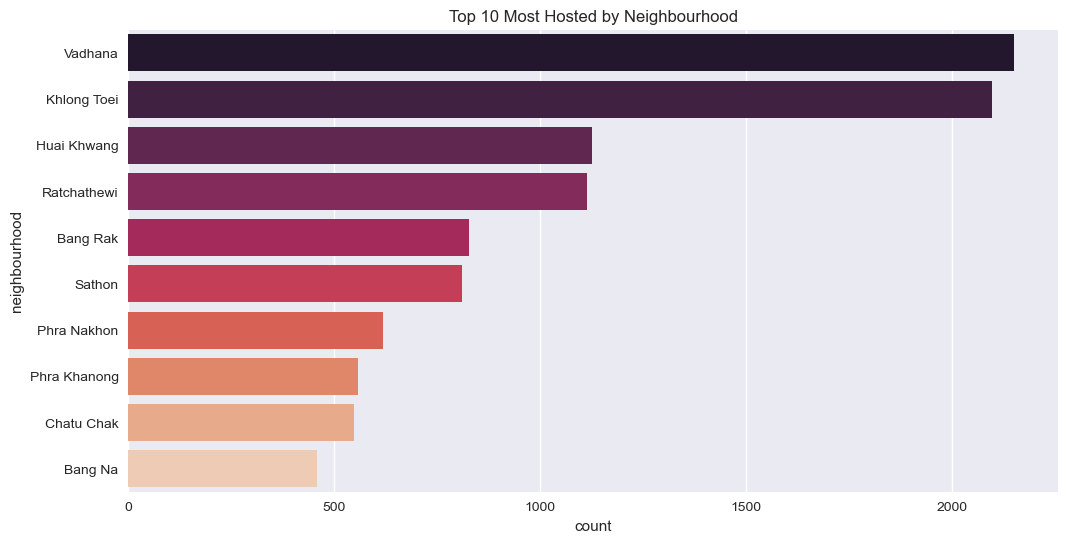

In [249]:
# 2. Deskripsi daerah dengan listing terbanyak

plt.figure(figsize=(12,6))
top_neighbourhoods = df1['neighbourhood'].value_counts().head(10)
sns.countplot(data=df1, y='neighbourhood', order=top_neighbourhoods.index, palette='rocket')
plt.title('Top 10 Most Hosted by Neighbourhood')
plt.xticks(rotation=0);

# Tampilkan top 10 neighbourhoods
print("Top 10 Neighbourhoods dengan Jumlah Listing Terbanyak:")
display(top_neighbourhoods)


> **Insights:**

* `Inner area` tidak hanya terbukti menjadi area dengan listing terbanyak, namun juga mendominasi kategori ini dengan 8 dari 10 neighbourhood nya menjadi daerah dengan listing terbanyak. Hal ini mengindikasi bahwa pusat kota dan sekitarnya menjadi lokasi paling populer untuk menyewakan properti melalui Airbnb.

* `Vadhana` dan `Khlong Toei` menjadi 2 neighbourhood yang memilki jumlah listing terbanyak dibandingkan dengan lingkungan lainnya, hal ini menandakan adanya permintaan yang sangat tinggi di daerah tersebut.

* `Phra Khanong` dan `Bang Na` merupakan `area Urban Fringe` (pinggiran kota) yang masuk dalam kategori 10 Neighbouhood dengan listing terbanyak. Ini menunjukkan bahwa ada permintaan yang cukup besar untuk Airbnb di area-area ini, ,`indikasi awal` mungkin karena harga yang lebih terjangkau atau daya tarik wisata tertentu.

Dari 10 tempat yang paling banyak hosting airbnb, mari kita lihat keunikan kotanya masing-masing.
1. Vadhana (Inner Area - 2150)<br>Dikenal dengan `kehidupan malam yang ramai, pusat perbelanjaan modern, dan berbagai restoran.` Distrik ini juga `dekat dengan kawasan bisnis dan pusat hiburan.`
2. Khlong Toei (Inner Area - 2096)<br>Dikenal sebagai`pusat distribusi barang dan makanan, dengan pasar tradisional yang terkenal,` seperti Pasar Khlong Toei. Distrik ini juga `menawarkan akses mudah ke pelabuhan dan transportasi umum.`
3. Huai Khwang (Inner Area - 1125)<br>
Terkenal dengan `komunitas lokal yang dinamis dan banyak pilihan tempat makan.` Distrik ini juga dikenal sebagai `lokasi untuk menikmati pertunjukan seni dan budaya, serta kehidupan malam yang bertenaga.`
4. Ratchathewi (Inner Area - 1113)<br>
Distrik yang `berkembang pesat dengan banyak hotel, pusat perbelanjaan, dan tempat wisata`. Ini adalah `lokasi strategis untuk akses ke transportasi umum seperti BTS.`
5. Bang Rak (Inner Area - 827) <br>
`Pusat budaya dan sejarah, dengan banyak bangunan tua dan landmark` seperti Wat Yannawa. Distrik ini juga `terkenal dengan makanan jalanan yang lezat dan suasana yang ramah.`
6. Sathon (Inner Area - 809)<br>
`Kawasan bisnis dengan banyak gedung pencakar langit dan kantor perusahaan.` Juga, terdapat `banyak restoran mewah dan bar dengan pemandangan indah dari atap gedung.`
7. Phra Nakhon (Inner Area - 619)<br>
`Distrik bersejarah`, Phra Nakhon memiliki banyak tempat wisata terkenal seperti Grand Palace dan Wat Pho. Ini adalah `jantung budaya Bangkok yang kaya akan sejarah.`
8. Phra Khanong (Urban Fringe - 557)<br>
`Area yang berkembang dengan banyak kafe, bar, dan ruang kreatif.` Distrik ini `menawarkan kombinasi antara suasana lokal yang tenang dan akses ke kota yang lebih besar.`
9. Chatuchak (Inner Area - 548)<br>
Terkenal dengan pasar akhir pekan Chatuchak yang sangat besar, di mana pengunjung dapat menemukan berbagai barang, mulai dari pakaian hingga makanan. Ini adalah `surga bagi para pecinta belanja.`
10. Bang Na (Urban Fringe - 457)<br>
`Kawasan yang lebih tenang dan berkembang, dengan banyak pusat perbelanjaan besar,` seperti Mega Bangna. Distrik ini juga `terhubung dengan akses ke transportasi dan fasilitas modern.`

In [250]:
# Menghitung Ocupancy Rate pada berdasarkan Area dan Neighbourhood

neighbourhood_occupancy = df1.groupby(['area','neighbourhood'])['occupancy_rate'].mean().reset_index()

neighbourhood_occupancy_sorted = neighbourhood_occupancy.sort_values(by='occupancy_rate', ascending=False)

# Tampilkan top 10 occupancy rate tertinggi
top_10_high_occupancy = neighbourhood_occupancy_sorted.head(10)

# Tampilkan top 5 occupancy rate terendah
top_5_low_occupancy = neighbourhood_occupancy_sorted.tail(5)

print("Top 10 Neighbourhood dengan Occupancy Rate Tertinggi:")
display(top_10_high_occupancy)

print("\nTop 5 Neighbourhood dengan Occupancy Rate Terendah:")
display(top_5_low_occupancy)


Top 10 Neighbourhood dengan Occupancy Rate Tertinggi:


area    neighbourhood  occupancy_rate
9          Inner      Huai Khwang       45.077191
20         Inner          Vadhana       37.750363
17         Inner   Samphanthawong       37.719474
49  Urban Fringe  Wang Thong Lang       36.786100
19         Inner        Thon buri       36.710604
3          Inner         Bang Sue       36.576320
11         Inner      Khlong Toei       36.453445
1          Inner       Bang Phlat       35.495787
40  Urban Fringe     Phra Khanong       35.386607
35  Urban Fringe      Khan Na Yao       34.366000


Top 5 Neighbourhood dengan Occupancy Rate Terendah:


area neighbourhood  occupancy_rate
44  Urban Fringe   Saphan Sung       21.887333
29  Urban Fringe     Bang Khae       21.482283
26      Suburban      Min Buri       21.143710
8          Inner         Dusit       16.314725
22      Suburban      Bang Bon        0.000000

In [251]:
# Group by area dan hitung rata-rata occupancy rate
area_occupancy = df1.groupby('area')['occupancy_rate'].mean().reset_index()
print("Rata-Rata Occupancy Rate berdasarkan Area")
area_occupancy

Rata-Rata Occupancy Rate berdasarkan Area


area  occupancy_rate
0         Inner       34.007462
1      Suburban       24.308587
2  Urban Fringe       29.964784

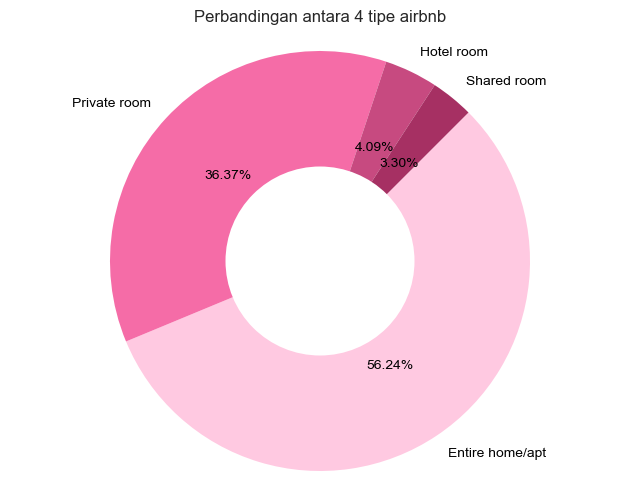

In [252]:
# 2. Menganalisa Tipe room dengan Ocupancy Rate untuk mengetahui Popularitas

#Mengelompokkan berdasarkan tipe dan mengurutkannya.
df_4type = df1.groupby("room_type").size().reset_index(name="count")
df_4type = df_4type.sort_values(by='count',ascending=False)

plt.figure(figsize=(8,6))
plt.pie(df_4type['count'],labels=df_4type['room_type'], 
        autopct= '%.2f%%',colors=['#ffc9e1','#f56ca7','#c74a80','#a63063'],
        startangle=45,counterclock=False,textprops={'color':'black'}
        )
plt.axis('equal')
fig=plt.gcf()
centre_circle = plt.Circle((0,0),0.45,fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Perbandingan antara 4 tipe airbnb')
plt.show()

- Terlihat jelas bahwa Tipe Entire room/apt dan Private room menjadi tipe kamar paling banyak, diasumsikan bahwa ini merupakan tipe kamar yang paling diminati karena wisatawan lebih mengutamakan privasi.
- Untuk listing dengan tipe kamar Hotel room pada Airbnb tidak terlau banyak, diasumsikan pemilik listing dengan tipe kamar ini menyediakan akses langsung untuk melakukan pemesenan ke hotel.
- Listing dengan tipe kamar Shared room sendiri tidak banyak diasumsikan karena kurangnya minat wisatawan pada tipe kamar ini.

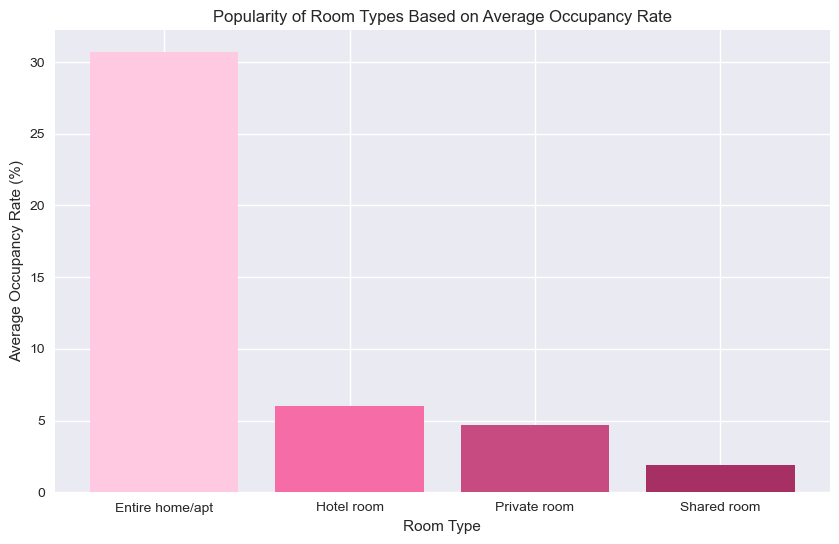

In [253]:
# Analyze the popularity of each room type using the occupancy_rate

# Group by room_type and calculate the mean occupancy_rate for each type
df_room_popularity = df1.groupby("room_type")['occupancy_rate'].median().reset_index(name="average_occupancy_rate")
df_room_popularity = df_room_popularity.sort_values(by='average_occupancy_rate', ascending=False)

# Plotting the popularity of each room type based on the average occupancy_rate
plt.figure(figsize=(10, 6))
plt.bar(df_room_popularity['room_type'], df_room_popularity['average_occupancy_rate'], 
        color=['#ffc9e1', '#f56ca7', '#c74a80', '#a63063'])

# Adding labels and title
plt.xlabel('Room Type')
plt.ylabel('Average Occupancy Rate (%)')
plt.title('Popularity of Room Types Based on Average Occupancy Rate')
plt.show()

- Melihat bar plot diatas dapat terlihat jelas bahwa Entire home/apt menjadi tipe kamar yang paling dicari dengan tingat hunia yang jauh lebih tinggi dibandingkan tipe kamar lainnya.
- Hotel room dan Private room memiliki beberapa permintaan, pasarnya tersendiri.
- Shared room menunjukkan tingkat popularitas paling renda, mungkin dikarenakan preferensi tamu terhadap privasi.

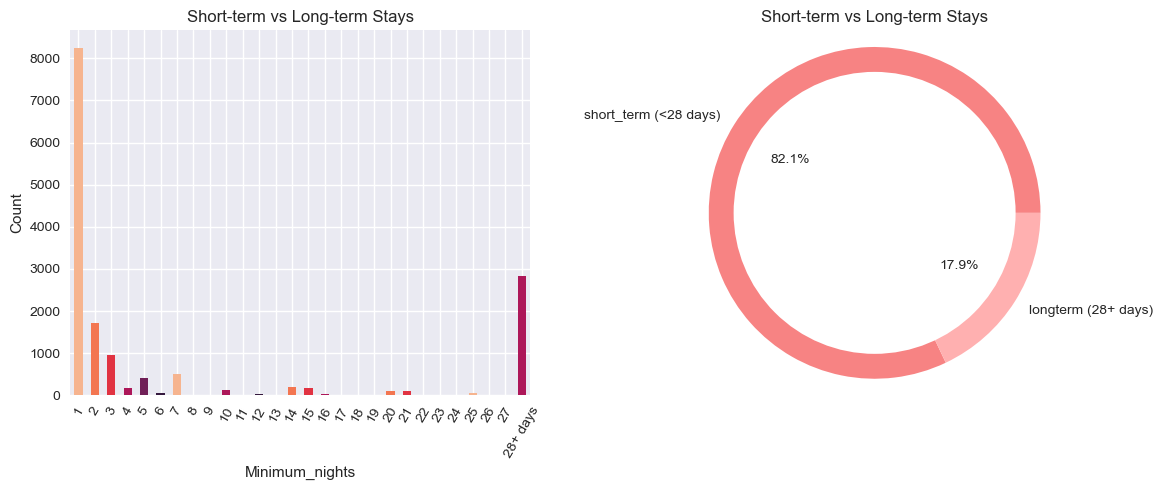

In [254]:
# 3. Menganalisa Tipe Short-term dan Long-term stay 

'''
Untuk menganalisa apakah listing tersebut memiliki kriteria short-term untuk minimum_night <28 night 
atau long-term untuk minimum_night berjumlah setidaknya 28 night.
'''

#membuat dataframe baru khusus untuk short-term dan long-term
df_stay = df1

#Bar 1 = membuat kartegori setiap hari sampai hari ke 28+
plt.figure(figsize=(12, 5))
def categorize_nights(value):
    if value >= 28:
        return '28+ days'
    else:
        return f'{value}'
df_stay['night_category'] = df_stay['minimum_nights'].apply(categorize_nights)

custom_order = [f'{i}' for i in range(1, 28)] + ['28+ days']

grouped_stay = df_stay['night_category'].value_counts().reindex(custom_order, fill_value=0)

# Bar plot untuk melihat persebaran short-term vs long-term
palet = sns.color_palette("rocket_r")
plt.subplot(1, 2, 1)
grouped_stay.plot(kind='bar', title='Short-term vs Long-term Stays',color=palet)
plt.xlabel('Minimum_nights')
plt.ylabel('Count')
plt.xticks(rotation=60, ha='center')

# Pie chart untuk presentase short-term dan long-term
plt.subplot(1, 2, 2)

grouped_stay2 = df_stay.groupby(df_stay['minimum_nights'] > 27)['id'].count()
grouped_stay2.index = ['short_term', 'long_term']

plt.pie(grouped_stay2, labels=['short_term (<28 days)', 'longterm (28+ days)'], autopct='%1.1f%%',  colors=['#f78383', '#ffb0b0'])
plt.title('Short-term vs Long-term Stays')
plt.axis('equal')
fig=plt.gcf()
centre_circle = plt.Circle((0,0),0.85,fc='white')
fig.gca().add_artist(centre_circle)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Bar Chart:
- Menunjukkan bahwa sebagian besar listing Airbnb memiliki persyaratan menginap kurang dari 28 malam, yang menunjukkan sebagian besar tempat dirancang untuk masa inap jangka pendek.
-Lebih dari 8000 listing mengakomodasikan tempatnya hanya 1 malam, diasumsikan bahwa wisatawan lebih dominan mencari masa menginap jangka pendek.
- Untuk listing yang menawarkan minimum_nights 28 malam atau lebih menandakan bahwa penginapan bulanan memiliki pasarnya sendiri, meskipun tidak terlalu besar.

Pie Chart:
- Menunjukkan bahwa 82.1% listingan ditunjukkan untuk penginapan short-term (kurang dari 18 malam), sedangkan 17.9% ditunjukkan untuk menginap long-term (28 malam atau lebih)

Dapat disimpulkan bahwa penyewaan jangka pendek mendominasi pasar AIrbnb, dimana dapat diasumsikan bahwa wisatawan lebih memilih tempat penginapan yang fleksibel dan bersifat sementara. 

Berdasarkan bar plot yang menampilkan harga sewa median per daerah di Bangkok, berikut beberapa kesimpulan yang dapat diambil:

Daerah dengan Harga Sewa Median Tertinggi:

Nong Chok menempati posisi tertinggi dengan harga sewa median yang melebihi 2,500 THB, menunjukkan bahwa ini adalah salah satu area yang lebih mahal untuk sewa rata-rata di Bangkok.
Parthum Wan, Vadhana, dan Samphanthawong juga termasuk dalam kategori dengan harga sewa median yang tinggi, berada di sekitar 2,000-2,500 THB.
Sebagian Besar Daerah Memiliki Harga Sewa Median yang Serupa:

Sebagian besar daerah di tengah-tengah grafik memiliki harga sewa median antara 1,000-2,000 THB, menunjukkan bahwa banyak daerah di Bangkok menawarkan harga sewa yang relatif sebanding.
Daerah dengan Harga Sewa Median Lebih Rendah:

Daerah seperti Wang Thong Lang, Nong Khaem, dan Don Mueang berada di bagian bawah dengan harga sewa median di bawah 1,000 THB, menunjukkan bahwa ini adalah area dengan harga sewa yang lebih terjangkau di Bangkok.
Distribusi yang Cukup Luas:

Plot ini menunjukkan adanya variasi yang cukup luas dalam harga sewa median di seluruh kota, dengan beberapa area yang sangat mahal dan lainnya yang jauh lebih terjangkau.

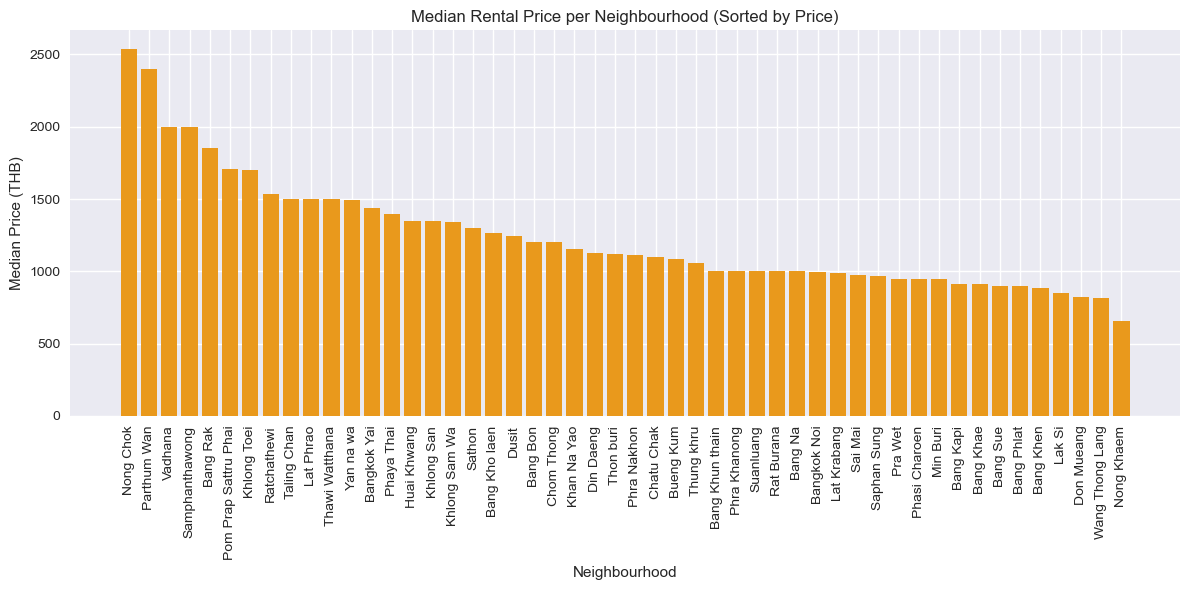

Top 10 Area by Price:


neighbourhood   price          area
0             Nong Chok  2539.0      Suburban
1           Parthum Wan  2400.0         Inner
2               Vadhana  2000.0         Inner
3        Samphanthawong  2000.0         Inner
4              Bang Rak  1850.0         Inner
5  Pom Prap Sattru Phai  1709.0         Inner
6           Khlong Toei  1700.0         Inner
7           Ratchathewi  1536.0         Inner
8           Taling Chan  1502.5  Urban Fringe
9             Lat Phrao  1500.0  Urban Fringe


Bottom 5 Area by Price:


neighbourhood  price          area
0        Bang Khen  882.0  Urban Fringe
1           Lak Si  850.0  Urban Fringe
2       Don Mueang  820.0  Urban Fringe
3  Wang Thong Lang  815.0  Urban Fringe
4       Nong Khaem  658.0  Urban Fringe

In [255]:
# 1. Menghitung median price untuk setiap neighbourhood
median_price_per_area = df1.groupby('neighbourhood')['price'].median().reset_index()

# 2. Mengurutkan berdasarkan median price
median_price_per_area_sorted = median_price_per_area.sort_values(by='price', ascending=False)

# 3. Membuat bar plot untuk median harga per neighbourhood
plt.figure(figsize=(12, 6))
plt.bar(median_price_per_area_sorted['neighbourhood'], median_price_per_area_sorted['price'], color='#e9991c')
plt.title('Median Rental Price per Neighbourhood (Sorted by Price)')
plt.xlabel('Neighbourhood')
plt.ylabel('Median Price (THB)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 4. Mendapatkan 10 harga median tertinggi dan 5 harga median terendah
top_10_median_price = median_price_per_area_sorted.head(10)
bottom_5_median_price = median_price_per_area_sorted.tail(5)

# 5. Menggabungkan informasi dengan area terkait
# Mengambil kolom 'neighbourhood' dan 'area' dari df1 dan menghapus duplikat
area_info = df1[['neighbourhood', 'area']].drop_duplicates()

# Menggabungkan dengan 10 median harga tertinggi
top_10_median_price_with_area = top_10_median_price.merge(area_info, on='neighbourhood', how='inner')

# Menggabungkan dengan 5 median harga terendah
bottom_5_median_price_with_area = bottom_5_median_price.merge(area_info, on='neighbourhood', how='inner')

# Menampilkan hasil
print('Top 10 Area by Price:')
display(top_10_median_price_with_area)

print('\nBottom 5 Area by Price:')
display(bottom_5_median_price_with_area)

> - `Area Inner` memiliki harga sewa yang lebih tinggi secara konsisten dibandingkan dengan wilayah Urban Fringe dan Suburban.<br> Ini menunjukkan bahwa area Inner lebih diminati dan memiliki potensi keuntungan yang lebih besar untuk bisnis penginapan.
> - `Nong Chok` sebagai satu-satunya wilayah Suburban dalam daftar 10 teratas menunjukkan adanya potensi yang mungkin tidak terpenuhi, yang bisa dieksplorasi lebih lanjut.
> - `Urban Fringe` memiliki harga sewa yang lebih rendah, terutama di area seperti Bang Khen, Lak Si, dan Don Mueang, yang mungkin cocok untuk pasar penginapan yang lebih terjangkau atau budget-friendly.
> - Parthum Wan, Vadhana, dan Samphanthawong adalah area Inner dengan harga tinggi, menjadikannya target potensial untuk penginapan kelas atas atau premium.

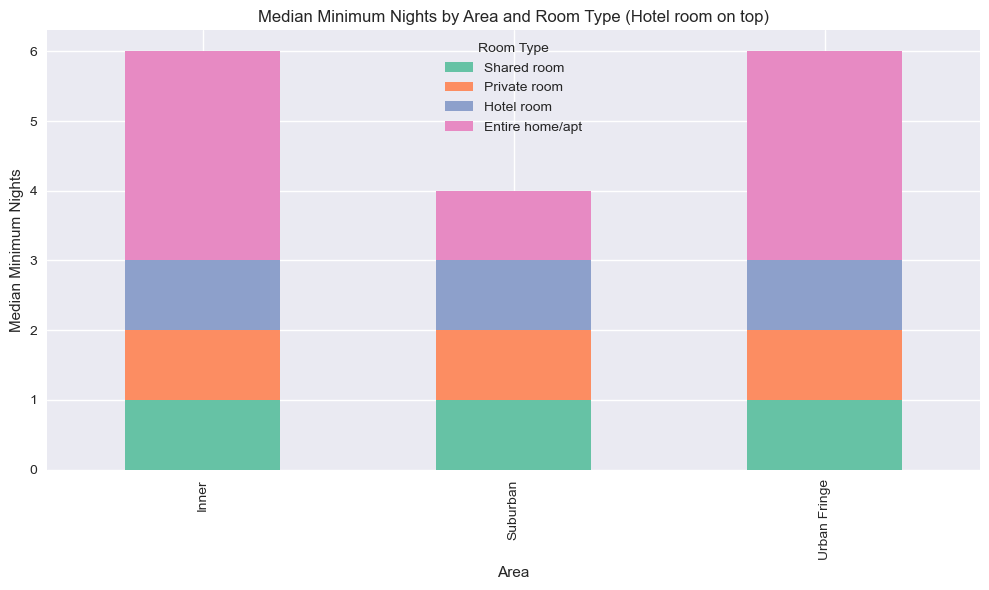

In [256]:
# 1. Membuat pivot table untuk menghitung median minimum_nights berdasarkan area dan tipe kamar

pivot_data = df1.pivot_table(
    index='area',
    columns='room_type',
    values='minimum_nights',
    aggfunc='median'
).fillna(0)

# 2. Mengatur urutan tipe kamar 
room_type_order = ['Shared room', 'Private room', 'Hotel room', 'Entire home/apt']
pivot_data_reordered = pivot_data[room_type_order]

pivot_data_reordered.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'])
plt.title('Median Minimum Nights by Area and Room Type (Hotel room on top)')
plt.xlabel('Area')
plt.ylabel('Median Minimum Nights')
plt.legend(title='Room Type', loc='upper center')
plt.tight_layout()
plt.show()

> - `Inner Area` cenderung lebih mengincar tamu dengan masa tinggal yang lebih lama, terutama untuk Entire home/apt, sehingga cocok untuk bisnis penginapan yang menargetkan ekspatriat, wisatawan jangka panjang, atau pekerja profesional.
> - `Suburban dan Urban Fringe` lebih fleksibel dalam hal durasi masa tinggal dan memiliki berbagai jenis akomodasi. Wilayah ini cocok untuk melayani tamu dengan kebutuhan akomodasi jangka pendek atau budget-friendly.
> - Menawarkan berbagai jenis kamar dengan durasi minimum yang bervariasi dapat meningkatkan daya tarik penginapan di setiap area, dengan mempertimbangkan preferensi masa tinggal di setiap wilayah.

**Kesimpulan:**
1. Top 10 Most Hosted by Neighbourhood
- Wilayah dengan jumlah listing tertinggi adalah Vadhana, Khlong Toei, dan Huai Khwang.
- Ini menunjukkan bahwa area tersebut memiliki banyak properti yang disewakan, yang bisa `berarti popularitas tinggi tetapi juga persaingan yang ketat.`
2. Top 10 Neighbourhood dengan Tingkat Okupansi Tertinggi
- Huai Khwang memiliki tingkat okupansi tertinggi (45%), diikuti oleh Vadhana (37.75%) dan Samphanthawong (37.72%).
- Ini menunjukkan `bahwa properti di area ini sering disewa, menandakan adanya permintaan yang tinggi.`
3. Popularitas Tipe Kamar Berdasarkan Tingkat Okupansi Rata-rata
- Entire home/apt memiliki tingkat okupansi tertinggi dibandingkan dengan tipe kamar lainnya.
- Ini menunjukkan bahwa `wisatawan cenderung menyukai privasi dan kenyamanan yang ditawarkan oleh tipe kamar ini.`
4. Analisis Durasi Tinggal
- Sebagian besar penginapan adalah untuk jangka pendek (kurang dari 28 hari), yaitu sekitar 82%.
- Ini berarti bahwa `permintaan untuk penginapan jangka panjang lebih rendah, sehingga Anda bisa lebih fokus pada akomodasi jangka pendek.`
5. Median Rental Price per Neighbourhood
- Nong Chok memiliki median harga tertinggi, diikuti oleh Parthum Wan dan Vadhana.
- Wilayah dengan `harga lebih rendah mungkin memiliki daya tarik yang lebih baik untuk wisatawan dengan anggaran terbatas.`

## Save Data setelah Analisa awal ke file CSV: <br> after_analisis_awal Airbnb Lisitng Bangkok.csv

In [257]:
df1.to_csv('after_analisis_awal Airbnb Lisitng Bangkok.csv', index=False)

In [258]:
df1 = pd.read_csv('after_analisis_awal Airbnb Lisitng Bangkok.csv')
df1.head()

Unnamed: 0      id  host_id   host_name neighbourhood  latitude  longitude  \
0           0   27934   120437      Nuttee   Ratchathewi  13.75983  100.54134   
1           1   27979   120541         Emy       Bang Na  13.66818  100.61674   
2           2   28745   123784  Familyroom     Bang Kapi  13.75232  100.62402   
3           3   35780   153730     Sirilak     Din Daeng  13.78823  100.57256   
4           4  941865   610315       Kasem     Bang Kapi  13.76872  100.63338   

         room_type  price  minimum_nights  number_of_reviews  \
0  Entire home/apt   1905               3                 65   
1     Private room   1316               1                  0   
2     Private room    800              60                  0   
3     Private room   1286               7                  2   
4     Private room   1905               1                  0   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.50                               2               353   
1               0.00                               2               358   
2               0.00                               1               365   
3               0.03                               1               323   
4               0.00                               3               365   

           area  reserved_days  occupancy_rate night_category  
0         Inner             12            3.29              3  
1  Urban Fringe              7            1.92              1  
2  Urban Fringe              0            0.00       28+ days  
3         Inner             42           11.51              7  
4  Urban Fringe              0            0.00              1

Step 3: Analisa Data Secara Kompeherensif

Analisa akan diperdalam di Area Inner city, pada 4 distrik dengan okupansi tertinggi, namun tidak berada dalam list 10 distrik dengan jumlah listing terbanyak.

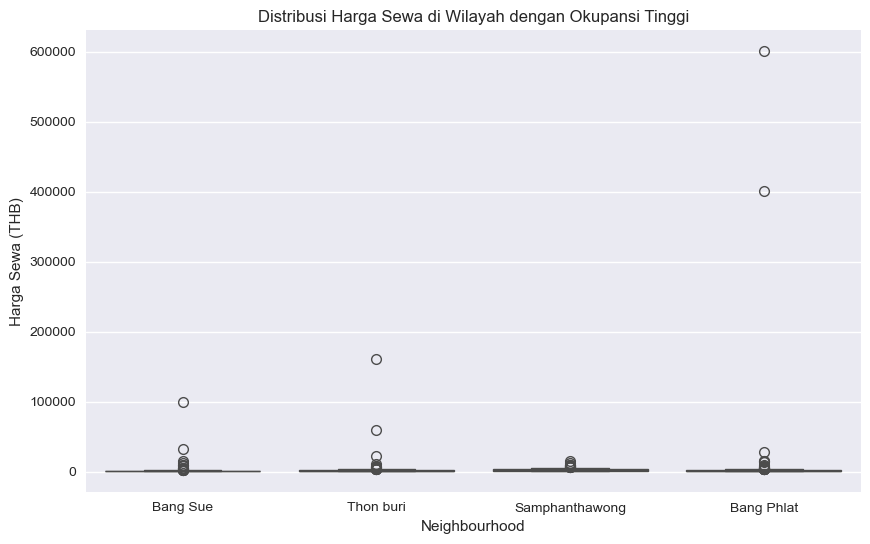

In [259]:
# 1. Memfilter Data Berdasarkan Wilayah dengan Tingkat Okupansi Tinggi
# Fokus pada wilayah Huai Khwang, Vadhana, dan Samphanthawong
selected_areas = ['Samphanthawong', 'Thon buri', 'Bang Sue', 'Bang Phlat']
filtered_df = df1[df1['neighbourhood'].isin(selected_areas)]


# Plot distribusi harga sewa untuk masing-masing wilayah
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood', y='price', data=filtered_df)
plt.title('Distribusi Harga Sewa di Wilayah dengan Okupansi Tinggi')
plt.xlabel('Neighbourhood')
plt.ylabel('Harga Sewa (THB)')
plt.show()



1. Adanya Outlier dengan Harga yang Sangat Tinggi:
* Terlihat beberapa outlier dengan harga yang sangat tinggi, bahkan mencapai lebih dari 600.000 THB per malam di beberapa wilayah seperti Thon Buri dan Samphanthawong. 
* Ini menunjukkan bahwa ada properti yang menargetkan pasar premium dengan fasilitas atau layanan mewah.
2. Sebagian Besar Harga Sewa Berada di Level Rendah:
* Sebagian besar harga sewa berkumpul di sekitar titik yang lebih rendah, yang ditunjukkan oleh kumpulan titik-titik dekat sumbu x. 
* Ini menunjukkan bahwa mayoritas properti di wilayah-wilayah ini memiliki harga yang lebih terjangkau.
3. Keseragaman di Antara Wilayah:
* Tidak ada perbedaan signifikan dalam distribusi harga di antara keempat wilayah ini, kecuali beberapa outlier yang terlihat. Ini menunjukkan bahwa struktur harga relatif serupa pada wilayah dengan Area yang sama yaitu Inner city, meskipun ada variasi dalam okupansi.

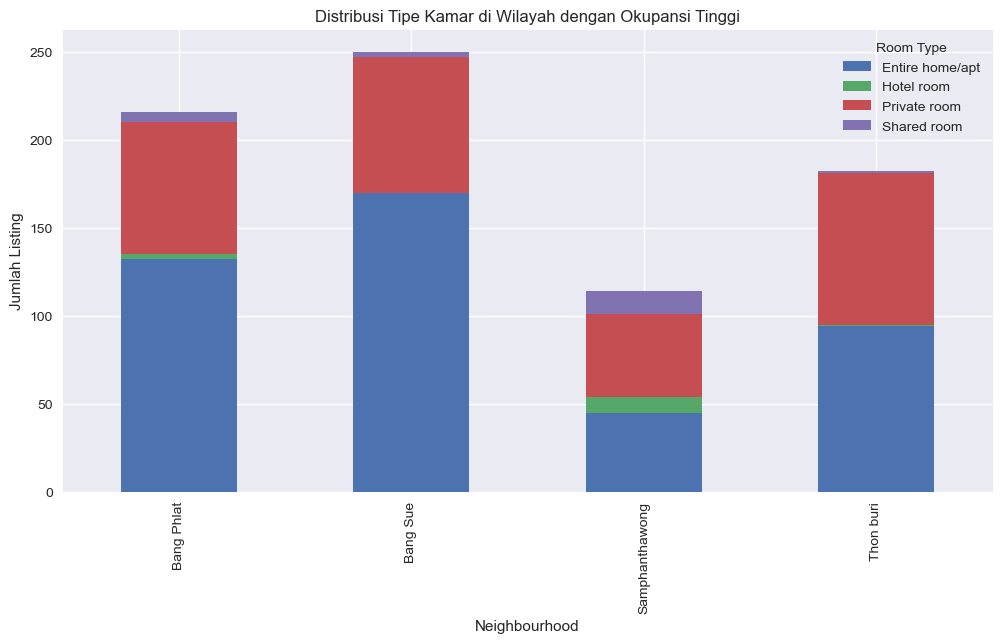

In [260]:
# Menghitung jumlah tipe kamar di setiap wilayah
room_type_distribution = filtered_df.groupby(['neighbourhood', 'room_type']).size().unstack(fill_value=0)

# Menampilkan distribusi tipe kamar
room_type_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribusi Tipe Kamar di Wilayah dengan Okupansi Tinggi')
plt.xlabel('Neighbourhood')
plt.ylabel('Jumlah Listing')
plt.legend(title='Room Type')
plt.show()


1. Dominasi "Entire home/apt" dan "Private room":
Di semua wilayah yang dianalisis, "Entire home/apt" dan "Private room" adalah tipe kamar yang paling banyak tersedia.
Ini menunjukkan bahwa wisatawan cenderung mencari akomodasi dengan privasi dan kenyamanan lebih, baik dalam bentuk apartemen atau kamar pribadi.

2. Terlihat Variasi Tipe Kamar Berdasarkan Wilayah:
* Bang Sue memiliki jumlah listing "Entire home/apt" terbanyak, menunjukkan bahwa area ini lebih banyak menawarkan akomodasi untuk tamu yang menginginkan privasi penuh.
* Samphanthawong memiliki distribusi yang lebih seimbang antara "Entire home/apt," "Private room," dan bahkan beberapa "Shared room," menandakan adanya variasi penawaran untuk berbagai jenis wisatawan.
* Thon Buri dan Bang Phlat juga memiliki jumlah "Entire home/apt" yang cukup banyak, tetapi "Private room" masih merupakan pilihan yang signifikan.

3. Ketersediaan "Hotel room" dan "Shared room" Rendah:
* "Hotel room" dan "Shared room" hanya tersedia dalam jumlah kecil di keempat wilayah ini. Hal ini menunjukkan bahwa permintaan untuk tipe akomodasi tersebut mungkin lebih rendah, atau bahwa pemilik properti lebih memilih untuk menyewakan ruang yang lebih privat.

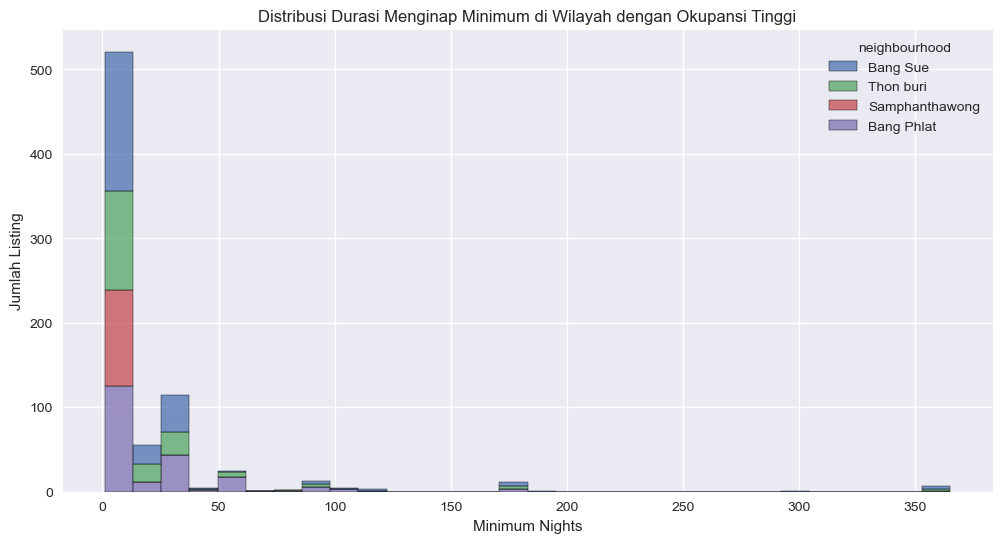

In [261]:
# Plot distribusi minimum_nights untuk masing-masing wilayah

plt.figure(figsize=(12, 6))
sns.histplot(data=filtered_df, x='minimum_nights', hue='neighbourhood', multiple='stack', bins=30)
plt.title('Distribusi Durasi Menginap Minimum di Wilayah dengan Okupansi Tinggi')
plt.xlabel('Minimum Nights')
plt.ylabel('Jumlah Listing')
plt.show()


1. Mayoritas Listing Memiliki Durasi Menginap Minimum yang Singkat (1-7 Malam):
* Sebagian besar listing memiliki durasi menginap minimum yang sangat rendah, terutama di bawah 7 malam. Hal ini menunjukkan bahwa penginapan di wilayah ini cenderung melayani tamu jangka pendek, seperti wisatawan atau pelancong bisnis.
* Jumlah listing yang paling banyak berada di sekitar 1-3 malam, yang berarti kebijakan menginap minimum sangat fleksibel, menarik bagi wisatawan yang mencari akomodasi jangka pendek.
* Dapat disimpulkan bahwa untuk Area Inner city akomodasi dengan durasi menginap yang fleksibel lebih populer.

In [262]:
from geopy.distance import geodesic

# Menentukan lokasi atraksi wisata atau fasilitas umum (contoh: stasiun BTS Asok)
attraction_location = (13.737, 100.560)  # Latitude dan Longitude untuk stasiun BTS Asok

# Menambahkan kolom jarak dari atraksi wisata ke dataframe
filtered_df['distance_to_attraction'] = filtered_df.apply(
    lambda row: geodesic((row['latitude'], row['longitude']), attraction_location).kilometers, axis=1
)

# Melihat beberapa baris pertama untuk memeriksa hasil
filtered_df[['neighbourhood', 'latitude', 'longitude', 'distance_to_attraction']]


neighbourhood   latitude   longitude  distance_to_attraction
44           Bang Sue  13.831480  100.521020               11.270861
88          Thon buri  13.726463  100.491293                7.522075
131         Thon buri  13.716990  100.478300                9.109792
153    Samphanthawong  13.739890  100.501790                6.303820
170          Bang Sue  13.831480  100.521510               11.251153
...               ...        ...         ...                     ...
15739        Bang Sue  13.812574  100.520922                9.368540
15765       Thon buri  13.731464  100.488059                7.804967
15773      Bang Phlat  13.788938  100.503600                8.379865
15796        Bang Sue  13.828505  100.527433               10.718901
15810        Bang Sue  13.829630  100.527890               10.820561

[762 rows x 4 columns]

1. Variasi Jarak ke Atraksi di Berbagai Wilayah:
* Penginapan di wilayah yang dianalisis memiliki jarak yang bervariasi dari stasiun BTS Asok. <br>
Contoh:<br>
Di Bang Sue, jarak ke atraksi berkisar antara sekitar 3.97 km hingga lebih dari 11 km.
Di Thon Buri, jaraknya berkisar antara 7.52 km hingga sekitar 9.11 km.
Di Samphanthawong, jaraknya sekitar 6.30 km dari atraksi.
Ini menunjukkan adanya perbedaan aksesibilitas ke atraksi utama di antara penginapan di wilayah yang berbeda.

2. Wilayah yang Relatif Lebih Dekat:
* Penginapan di Samphanthawong memiliki jarak yang lebih dekat dengan atraksi utama (sekitar 6.30 km), yang dapat menjadi daya tarik bagi wisatawan yang ingin berada lebih dekat dengan pusat kota atau transportasi umum.
* Beberapa penginapan di Bang Sue dan Thon Buri juga berada pada jarak yang relatif lebih pendek, sekitar 7-9 km dari stasiun BTS Asok, yang masih dapat dianggap sebagai jarak yang dapat ditempuh dengan nyaman.

3. Pengaruh Jarak Terhadap Permintaan:
* Penginapan yang lebih dekat ke atraksi atau pusat transportasi utama biasanya lebih diminati karena akses yang lebih mudah ke berbagai tempat wisata. 
* Dengan jarak yang lebih dekat, penginapan di Samphanthawong kemungkinan besar akan memiliki permintaan yang lebih tinggi dibandingkan dengan wilayah yang lebih jauh seperti beberapa bagian dari Bang Sue.

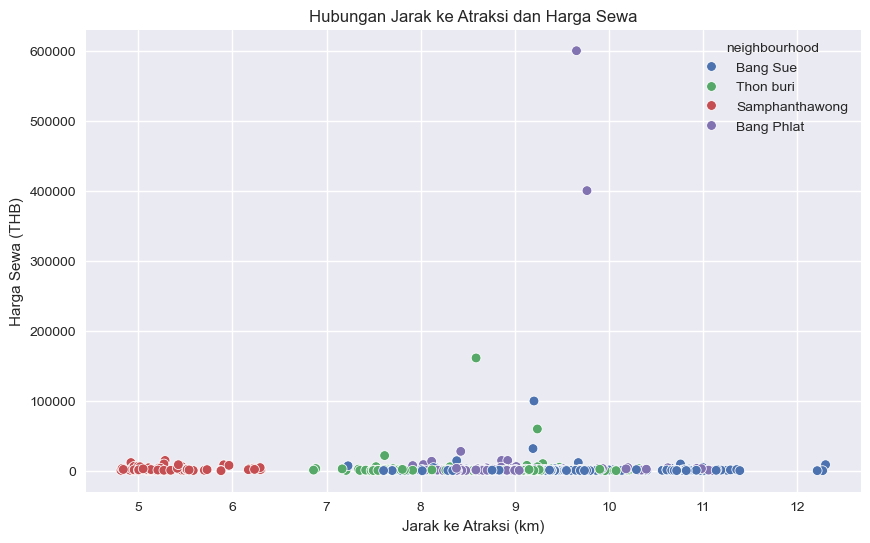

In [263]:
# Plot hubungan antara jarak dan harga sewa
plt.figure(figsize=(10, 6))
sns.scatterplot(x='distance_to_attraction', y='price', hue='neighbourhood', data=filtered_df)
plt.title('Hubungan Jarak ke Atraksi dan Harga Sewa')
plt.xlabel('Jarak ke Atraksi (km)')
plt.ylabel('Harga Sewa (THB)')
plt.show()


1. Tidak ditemukan adanya korelasi antara Harga sewa dengan jarak ke atraksi/fasilitas umum. <br>
Hal ini menunjukkan bahwa faktor-faktor lain mungkin lebih berpengaruh terhadap harga sewa, seperti fasilitas yang disediakan, ukuran properti, atau target pasar.

2. Outlier dengan Harga Sewa Sangat Tinggi:<br>
Terdapat beberapa outlier dengan harga sewa yang sangat tinggi, mencapai lebih dari 600.000 THB, meskipun jaraknya relatif jauh dari fasilitas umum.
Outlier ini kemungkinan besar merupakan properti mewah atau penginapan premium yang menawarkan fasilitas eksklusif, yang membuatnya memiliki harga sewa yang tinggi terlepas dari lokasinya.

3. Harga Sewa Lebih Tinggi di Wilayah Samphanthawong:<br>
Di wilayah Samphanthawong, beberapa listing memiliki harga yang lebih tinggi dibandingkan dengan wilayah lain, bahkan pada listing dengan jarak yang lebih pendek (sekitar 5-6 km).Ini menunjukkan bahwa wilayah ini mungkin memiliki daya tarik khusus atau pasar yang bersedia membayar lebih untuk akses yang lebih dekat ke pusat kota.

4. Penginapan dengan Harga Rendah Tersebar di Semua Jarak:<br>
Sebagian besar listing memiliki harga yang lebih rendah dan tersebar di berbagai jarak (5-12 km). Ini menunjukkan bahwa penginapan dengan harga lebih terjangkau tersedia di berbagai lokasi, bukan hanya yang dekat dengan atraksi utama.

In [265]:
# Save Final Analysist Project Airbnb 

df1.to_csv('Grasiela_Final_Capstone_Project Airbnb Lisitng Bangkok .csv', index=False)

## Kesimpulan:
1. Distribusi Harga Sewa

Harga sewa di keempat distrik (Bang Sue, Thon Buri, Samphanthawong, dan Bang Phlat) memiliki variasi yang signifikan, dengan beberapa titik ekstrem yang menunjukkan harga sewa sangat tinggi. Khususnya, Bang Phlat terlihat memiliki listing dengan harga sewa tertinggi dibandingkan distrik lain. Mayoritas harga sewa berada di rentang yang lebih rendah, menunjukkan ada beberapa listing premium dengan harga jauh di atas rata-rata.

2. Distribusi Tipe Kamar

Data menunjukkan bahwa tipe kamar yang paling umum di semua distrik adalah "Entire home/apt", diikuti oleh "Private room". Bang Sue dan Bang Phlat memiliki jumlah listing tipe "Entire home/apt" yang lebih banyak, yang bisa menjadi indikasi bahwa distrik ini lebih populer bagi wisatawan atau pengunjung yang mencari privasi penuh.
Tipe "Shared room" dan "Hotel room" hanya sebagian kecil dari keseluruhan listing, menunjukkan bahwa akomodasi yang ditawarkan lebih cenderung ke arah hunian pribadi daripada penginapan umum.

3. Distribusi Durasi Menginap Minimum

Mayoritas listing di keempat distrik memiliki durasi minimum menginap yang sangat singkat, mayoritas kurang dari 30 malam. Ini menunjukkan bahwa wilayah-wilayah ini cocok untuk wisatawan jangka pendek atau pelancong bisnis. Hanya ada sedikit listing dengan durasi minimum menginap lebih dari 30 malam, menandakan kurangnya fokus pada penyewa jangka panjang di wilayah ini.

4. Hubungan Jarak ke Atraksi dan Harga Sewa

Berdasarkan grafik, terdapat kecenderungan bahwa harga sewa meningkat seiring dengan bertambahnya jarak dari atraksi, terutama di Bang Phlat. Namun, untuk wilayah lain seperti Thon Buri dan Samphanthawong, harga sewa cenderung tetap stabil meskipun jarak ke atraksi bertambah. Listing yang berada dekat dengan atraksi (5-7 km) cenderung memiliki harga sewa yang lebih rendah, menunjukkan permintaan yang lebih tinggi untuk lokasi yang strategis atau fasilitas yang mungkin tidak sebaik listing yang berada lebih jauh.

## Rekomendasi untuk Tim Investor

1. Targetkan Wilayah dengan Harga Sewa Tinggi dan Listing yang Terbatas

Bang Phlat terlihat memiliki potensi harga sewa yang lebih tinggi, terutama untuk listing eksklusif. Investor dapat mempertimbangkan untuk membangun properti dengan fasilitas premium di wilayah ini untuk menarik wisatawan kelas atas atau penyewa jangka panjang dengan daya beli tinggi.

2. Fokus pada Properti dengan "Entire Home/Apt"

Mengingat bahwa tipe "Entire home/apt" adalah yang paling diminati, tim investasi disarankan untuk fokus pada pengembangan properti yang menawarkan privasi penuh dan pengalaman hunian seperti rumah. Properti ini dapat dilengkapi dengan fasilitas lengkap dan mewah untuk menarik lebih banyak penyewa.

3. Pertimbangkan Durasi Menginap yang Fleksibel

Mengingat banyaknya listing dengan durasi minimum menginap yang singkat, tim investor dapat menarik lebih banyak pelanggan dengan menawarkan opsi sewa jangka pendek dan jangka panjang. Hal ini dapat menarik wisatawan, pelancong bisnis, dan juga ekspatriat yang mencari tempat tinggal sementara.

4. Pilih Lokasi yang Strategis namun Terjangkau

Berdasarkan analisis jarak ke atraksi dan harga sewa, listing yang terletak agak jauh dari atraksi (sekitar 7-9 km) masih memiliki harga sewa yang kompetitif. Investor dapat mempertimbangkan lokasi-lokasi ini untuk mendapatkan properti dengan harga tanah yang lebih rendah namun tetap dapat menarik penyewa dengan harga sewa yang lebih tinggi.

5. Diversifikasi Jenis Listing

Selain fokus pada "Entire home/apt," menawarkan beberapa listing dengan "Private room" dapat menjadi strategi untuk memenuhi kebutuhan pasar yang lebih luas. Properti dengan beberapa unit dapat memberikan opsi bagi penyewa yang mencari harga lebih terjangkau atau wisatawan solo.
